In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


In [2]:
appData = pd.read_csv("googleplaystore.csv")
dataUserReview = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
appData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
appData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#Først sørger vi for at fjerne NaN værdier for at gøre det nemmere for os selv i fremtiden da vi skal predicte en rating
appData.dropna(inplace=True)

In [6]:
appData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
ValCategory = appData["Category"].unique()
ValCategoryCount = len(ValCategory)
StringCategory = appData["Category"]
category = {}
for i in range(0,ValCategoryCount):
    category[ValCategory[i]] = i
appData["Category_new"] = appData["Category"].map(category).astype(int)

In [8]:
ValGenre = appData.Genres.unique()
genre = {}
for i in range(len(ValGenre)):
    genre[ValGenre[i]] = i
appData['Genres_new'] = appData['Genres'].map(genre).astype(int)
    

In [9]:
#Convert Content rating to Int
ValContentRating = appData['Content Rating'].unique()
contentRating = {}
for i in range(len(ValContentRating)):
    contentRating[ValContentRating[i]] = i
appData['Content Rating'] = appData['Content Rating'].map(contentRating).astype(int)

In [10]:
#Convert Type to Int
def TypeInt(types):
    if types == 'Free':
        return 0
    else:
        return 1
appData['Type'] = appData['Type'].map(TypeInt)

In [11]:
#Convert Size til float64
def SizeFloat64(size):
    if 'M' in size:
        new_size = size[:-1]
        new_size = float(new_size)*1000000
        return new_size
    elif 'k' == size[-1:]:
        new_size = size[:-1]
        new_size = float(new_size)*1000
        return new_size
appData['Size'] = appData['Size'].map(SizeFloat64)

appData.Size.fillna(method = 'ffill', inplace = True)
        

In [12]:
#Convert Installs to Int
appData['Installs'] = [int(i[:-1].replace(',','')) for i in appData['Installs']]

In [13]:
#Convert Reviews til Int
appData['Reviews'] = appData['Reviews'].astype(int)

In [14]:
#Convert Price til Float64
def priceFloat64(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price
    
appData['Price'] = appData['Price'].map(priceFloat64).astype(float)

In [15]:
#Vi fjerne til sidst parametre som vi ikke mener vil være til gavn for os
appData.drop(labels = ['App','Last Updated','Current Ver','Android Ver'],axis = 1, inplace = True)

In [16]:
appData.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_new,Genres_new
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [17]:
#Her er Category fordelt på hver sin column
appData2 = pd.get_dummies(appData, columns=['Category'])

In [18]:
appData2.head()


,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_new,Genres_new,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


In [19]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int32
Genres            9360 non-null object
Category_new      9360 non-null int32
Genres_new        9360 non-null int32
dtypes: float64(3), int32(4), int64(2), object(2)
memory usage: 731.2+ KB


In [20]:
X = appData2.drop(labels = ['Rating','Genres', 'Category_new'],axis = 1)
y = appData2.Rating


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [30]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Score:", score)

Score: -0.025071515636976294


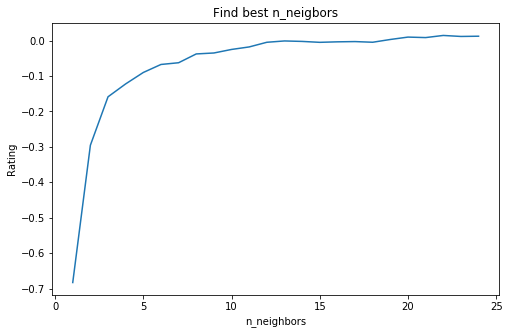

In [23]:
#Looking for a better n_neighbors testing...
n_neighbors = np.arange(1, 25, 1)
scoreArray = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scoreArray.append(model.score(X_test, y_test))
    
#Plotting
plt.figure(figsize=(8,5))
plt.title("Find best n_neigbors")
plt.xlabel("n_neighbors")
plt.ylabel("Rating")
plt.plot(n_neighbors, scoreArray)


In [29]:
model = KNeighborsRegressor(n_neighbors=14)
model.fit(X_train, y_train)
adjusted_score = model.score(X_test,y_test)
print(adjusted_score)

-0.0024002304110268824


In [28]:
pred = model.predict(X_test)

In [26]:
#Calculating MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, pred)
print(mse)

0.4625480769230769
